# Aula 06 - Visualização de Dados

Ao trabalharmos com dados, é importantíssimo que saibamos mostrar adequadamente nossas conclusões a partir de nossas análises. Além disso, gráficos podem ser muito úteis, como já mencionamos em outras aulas, para nos auxiliar em processos de **análises exploratórias de dados**.

Vamos tratar mais especificamente sobre este tipo de análise na próxima aula. Na presente aula, vamos avaliar algumas opções de visualizações de dados, compreendendo quando elas costumam ser mais utilizadas e porquê. Daremos enfoque especial às visualizações geradas com **pandas**, mas mencionaremos também alguns outros pacotes gráficos bastante úteis e usuais em Ciência de Dados.

## Gráficos: para que servem?

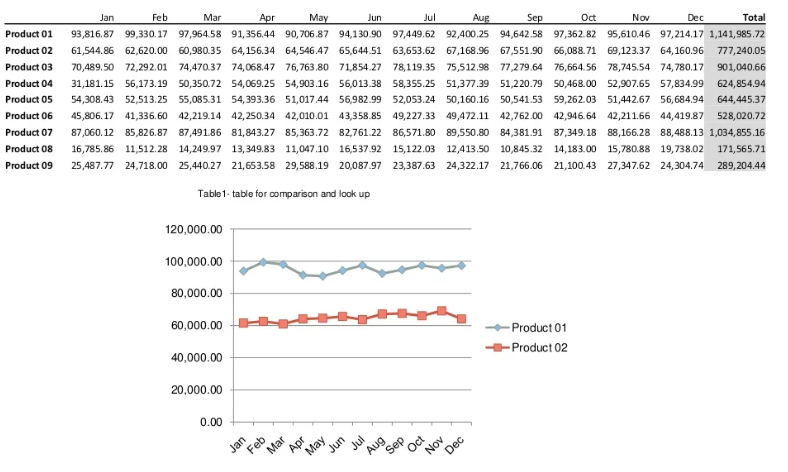

Comparando a tabela e o gráfico acima, podemos citar como:

- Vantagens: acompanhar mais facilmente as informações; ou dar destaque mais facilmente.

- Desvantagens: perdemos a informação precisa de cada número.

Gráficos, assim como tabelas, representam **relações entre diferentes grandezas/variáveis**. Em particular, os gráficos permitem destacar informações com uma rápida "batida de olho". Em contraste, tabelas podem detalhar informações um pouco melhor, no sentido de apresentar valores mais precisos que nem sempre podem ser postos em uma visualização gráfica limpa e eficiente.

Em geral, **um bom gráfico destaca informações e padrões de maneira clara**.

### Principais tipos de gráficos

#### Gráfico de linhas

Usualmente utilizados quando queremos analisar a **evolução temporal** de determinadas quantidades.

Como exemplo, vamos avaliar um conjunto de dados com casos de COVID-19.

In [3]:
import pandas as pd
df = pd.read_csv("../../Datasets/Covid_19_Countrywise_timeseries.csv")

In [4]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


#### Qual o intervalo de datas destes dados?

In [6]:
df.dtypes

Unnamed: 0           int64
ObservationDate     object
country             object
Confirmed            int64
Deaths               int64
Recovered            int64
Code                object
latitude           float64
longitude          float64
New Confirmed        int64
New Recovered        int64
New Death            int64
dtype: object

In [7]:
print(df['ObservationDate'].unique().min())
print(df['ObservationDate'].unique().max())

01/22/2020
03/28/2020


#### O que poderíamos visualizar, de interessante, nestes dados?

In [8]:
# Novos casos confirmados por dia
dg = df.groupby("ObservationDate")['New Confirmed'].sum()
dg

ObservationDate
01/22/2020      555
01/23/2020       99
01/24/2020      287
01/25/2020      497
01/26/2020      680
              ...  
03/24/2020    40406
03/25/2020    49628
03/26/2020    61995
03/27/2020    63700
03/28/2020    67412
Name: New Confirmed, Length: 67, dtype: int64

<AxesSubplot: xlabel='ObservationDate'>

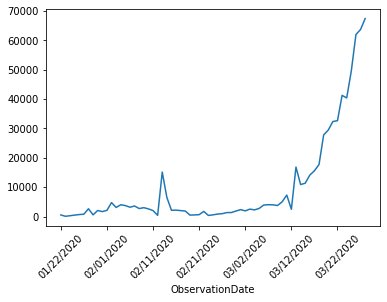

In [11]:
dg.plot(rot = 45)

In [12]:
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


<AxesSubplot: title={'center': 'Total de casos e mortes confirmadas'}, xlabel='Data', ylabel='Total de casos'>

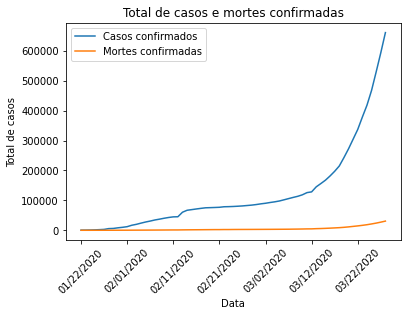

In [18]:
# Algumas opções de personalização do gráfico
df.rename(columns = {'Confirmed': 'Casos confirmados', 'Deaths': 'Mortes confirmadas'}, inplace = True)
# Plot de casos confirmados e mortes confirmadas por dia (acumulado; soma entre todos os países)
df.groupby("ObservationDate")[['Casos confirmados', 'Mortes confirmadas']].agg('sum').plot(kind = 'line',
                                                                       rot = 45,
                                                                       xlabel = 'Data',
                                                                      ylabel = 'Total de casos',
                                                                      title = 'Total de casos e mortes confirmadas')

#### Gráfico de barras

No gráfico de barras, geralmente visualizamos relações quantitativas de **variáveis categóricas**. É comum que a visualização em gráfico de barras esteja relacionada a **quantidades discretas**.

**O que poderíamos investigar no mesmo dataset que estamos avaliando?**

In [20]:
df.head()

,Unnamed: 0,ObservationDate,country,Casos confirmados,Mortes confirmadas,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


In [19]:
len(df['country'].unique())

212

<AxesSubplot: xlabel='country'>

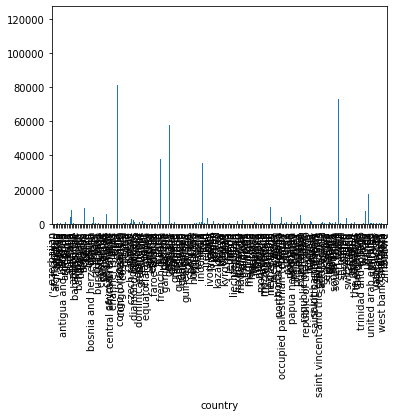

In [21]:
# Total de casos por país
df\
    .groupby("country")\
    ['New Confirmed']\
    .sum()\
    .plot(kind = 'bar')

A visualização acima é bastante bagunçada, e há vários países com pouquíssimos casos (comparados a outros). Como poderíamos manter apenas os países com casos mais críticos?

In [23]:
# Vamos olhar, por exemplo, casos e mortes em uma mesma visualização nos países mais críticos
dg = df\
    .groupby("country")\
    [['New Confirmed', 'New Death']]\
    .sum()
dg

,New Confirmed,New Death
country,,
azerbaijan,0,0
"('st. martin',)",2,0
afghanistan,110,4
albania,197,10
algeria,454,29
...,...,...
venezuela,119,2
vietnam,174,0
west bank and gaza,98,1


<AxesSubplot: ylabel='country'>

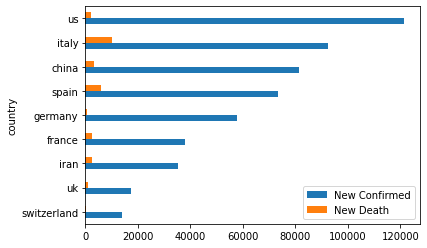

In [31]:
# Vamos plotar apenas países com casos maiores que "N"
N = 10000
dg[dg['New Confirmed'] > N]\
    .sort_values(by = 'New Confirmed')\
    .plot(kind = 'barh')

<AxesSubplot: ylabel='country'>

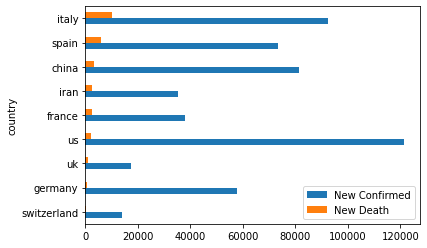

In [32]:
# Vamos plotar apenas países com casos maiores que "N"
N = 10000
dg[dg['New Confirmed'] > N]\
    .sort_values(by = 'New Death')\
    .plot(kind = 'barh')

#### Gráfico de pizza

Dentre os 10 países com mais casos de COVID-19 registrados no dataset, visualizemos a porcentagem de casos em cada um destes países.

In [37]:
top_10_countries = dg.sort_values(by = 'New Confirmed', ascending = False)[0:10]
top_10_countries

,New Confirmed,New Death
country,,
us,121478,2026
italy,92472,10023
china,81401,3295
spain,73235,5982
germany,57695,433
france,38105,2317
iran,35408,2517
uk,17312,1021
switzerland,14076,264


<AxesSubplot: ylabel='New Confirmed'>

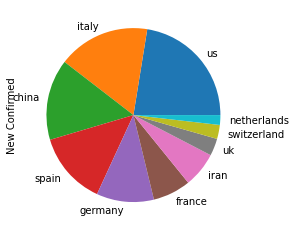

In [39]:
top_10_countries['New Confirmed'].plot(kind = 'pie')

#### Gráfico de dispersão (scatter plot)

In [40]:
df.head()

,Unnamed: 0,ObservationDate,country,Casos confirmados,Mortes confirmadas,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


C:\Users\cstefano\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1010: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Casos confirmados', ylabel='Mortes confirmadas'>

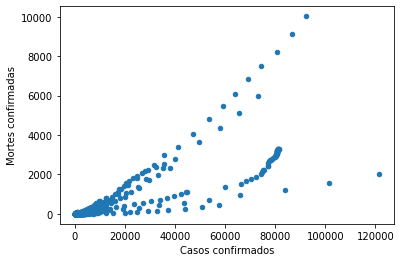

In [41]:
df.plot(kind = 'scatter',
       x = 'Casos confirmados',
       y = 'Mortes confirmadas')

<AxesSubplot: xlabel='Casos confirmados', ylabel='Mortes confirmadas'>

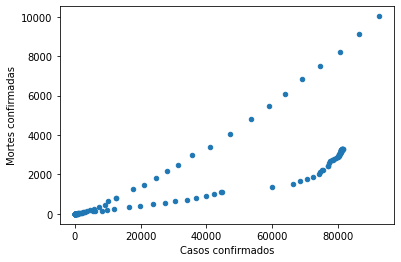

In [42]:
df2 = df[df['country'].isin(['china','italy'])]
df2.plot(kind = 'scatter',
        x = 'Casos confirmados',
        y = 'Mortes confirmadas')

<AxesSubplot: xlabel='Casos confirmados', ylabel='Mortes confirmadas'>

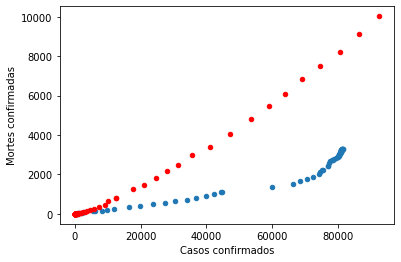

In [46]:
ax = df2[df2['country'] == 'china'].plot(kind = 'scatter', x = 'Casos confirmados', y = 'Mortes confirmadas')
df2[df2['country'] == 'italy'].plot(kind = 'scatter', x = 'Casos confirmados', y = 'Mortes confirmadas', ax = ax, color = 'r')

#### Histogramas

Quando extraímos dados de medições que realizamos, é muito comum que nem todas as medições, feitas sob as mesmas condições, retornem, necessariamente, exatamente os mesmos valores (por quê?). Sendo assim, torna-se útil visualizar a **distribuição** dos valores que estamos mensurando, para entender as faixas de valores em que estamos trabalhando, e a **dispersão** desses valores.

No histograma, representamos, no eixo-x, **intervalos pré-determinados de valores**, e, no eixo-y (frequência), a **contagem** da ocorrência daquele intervalo, dentro de todo o conjunto de dados. Geralmente usamos, para isso, um gráfico de barras.

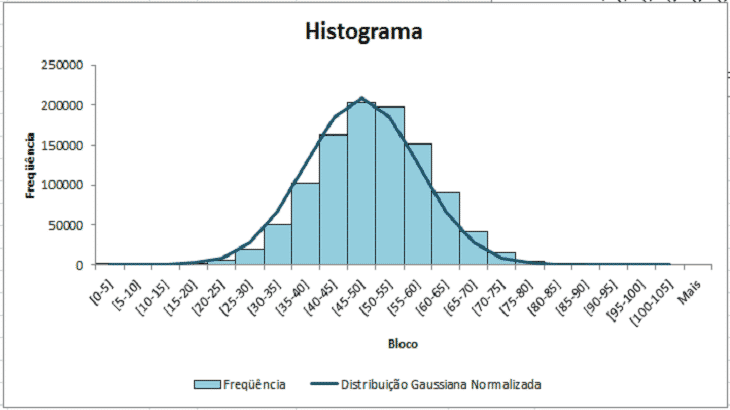

Apesar de o formato de histograma ilustrado na figura acima ("sino invertido") ser bastante comum, nem sempre as características que estamos explorando terão esse tipo de distribuição. Em nosso dataset de COVID, por exemplo, a distribuição do número de novos casos confirmados é bem distinta desta.

<AxesSubplot: ylabel='Frequency'>

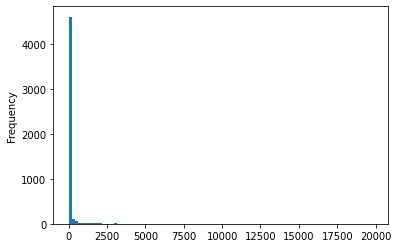

In [54]:
df['New Confirmed'].plot(kind = 'hist', bins = 100)

In [55]:
df['New Confirmed'].mean()

133.05690729941685

#### Boxplot

Um boxplot possui uma ideia bastante similar a um histograma. Seu objetivo é indicar **pontos estatísticos de interesse da distribuição da quantidade sendo avaliada**. Usualmente, um boxplot contém 5 pontos de interesse: a mediana da distribuição, os pontos do primeiro (Q1) e terceiro (Q3) quartis, e os pontos de corte a partir dos quais consideraremos as observações como **outliers**.

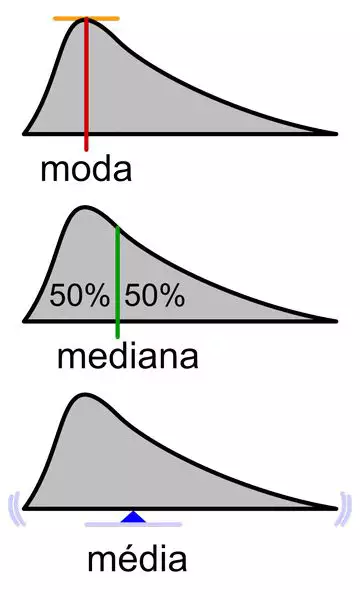

A **mediana** divide os valores da distribuição (ordenados) exatamente ao meio.

Um **outlier** é um ponto que **destoa** muito da distribuição, quando comparado aos demais!

-> O que seria "destoar muito"? Como quantificamos isso?

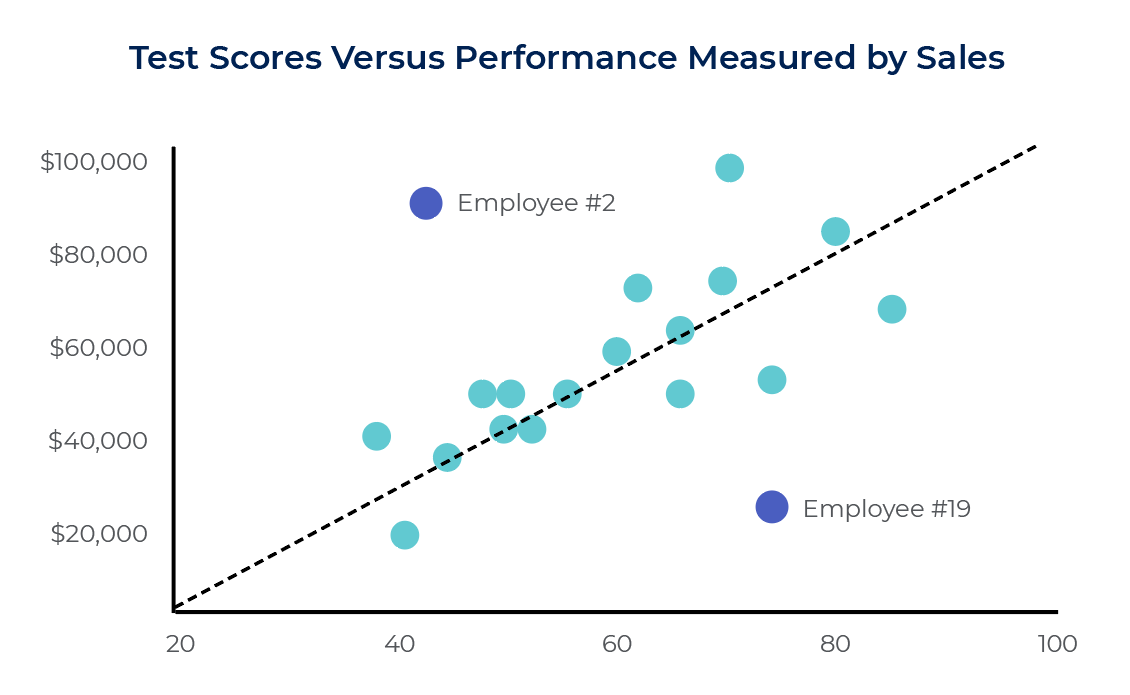

Elementos do boxplot:

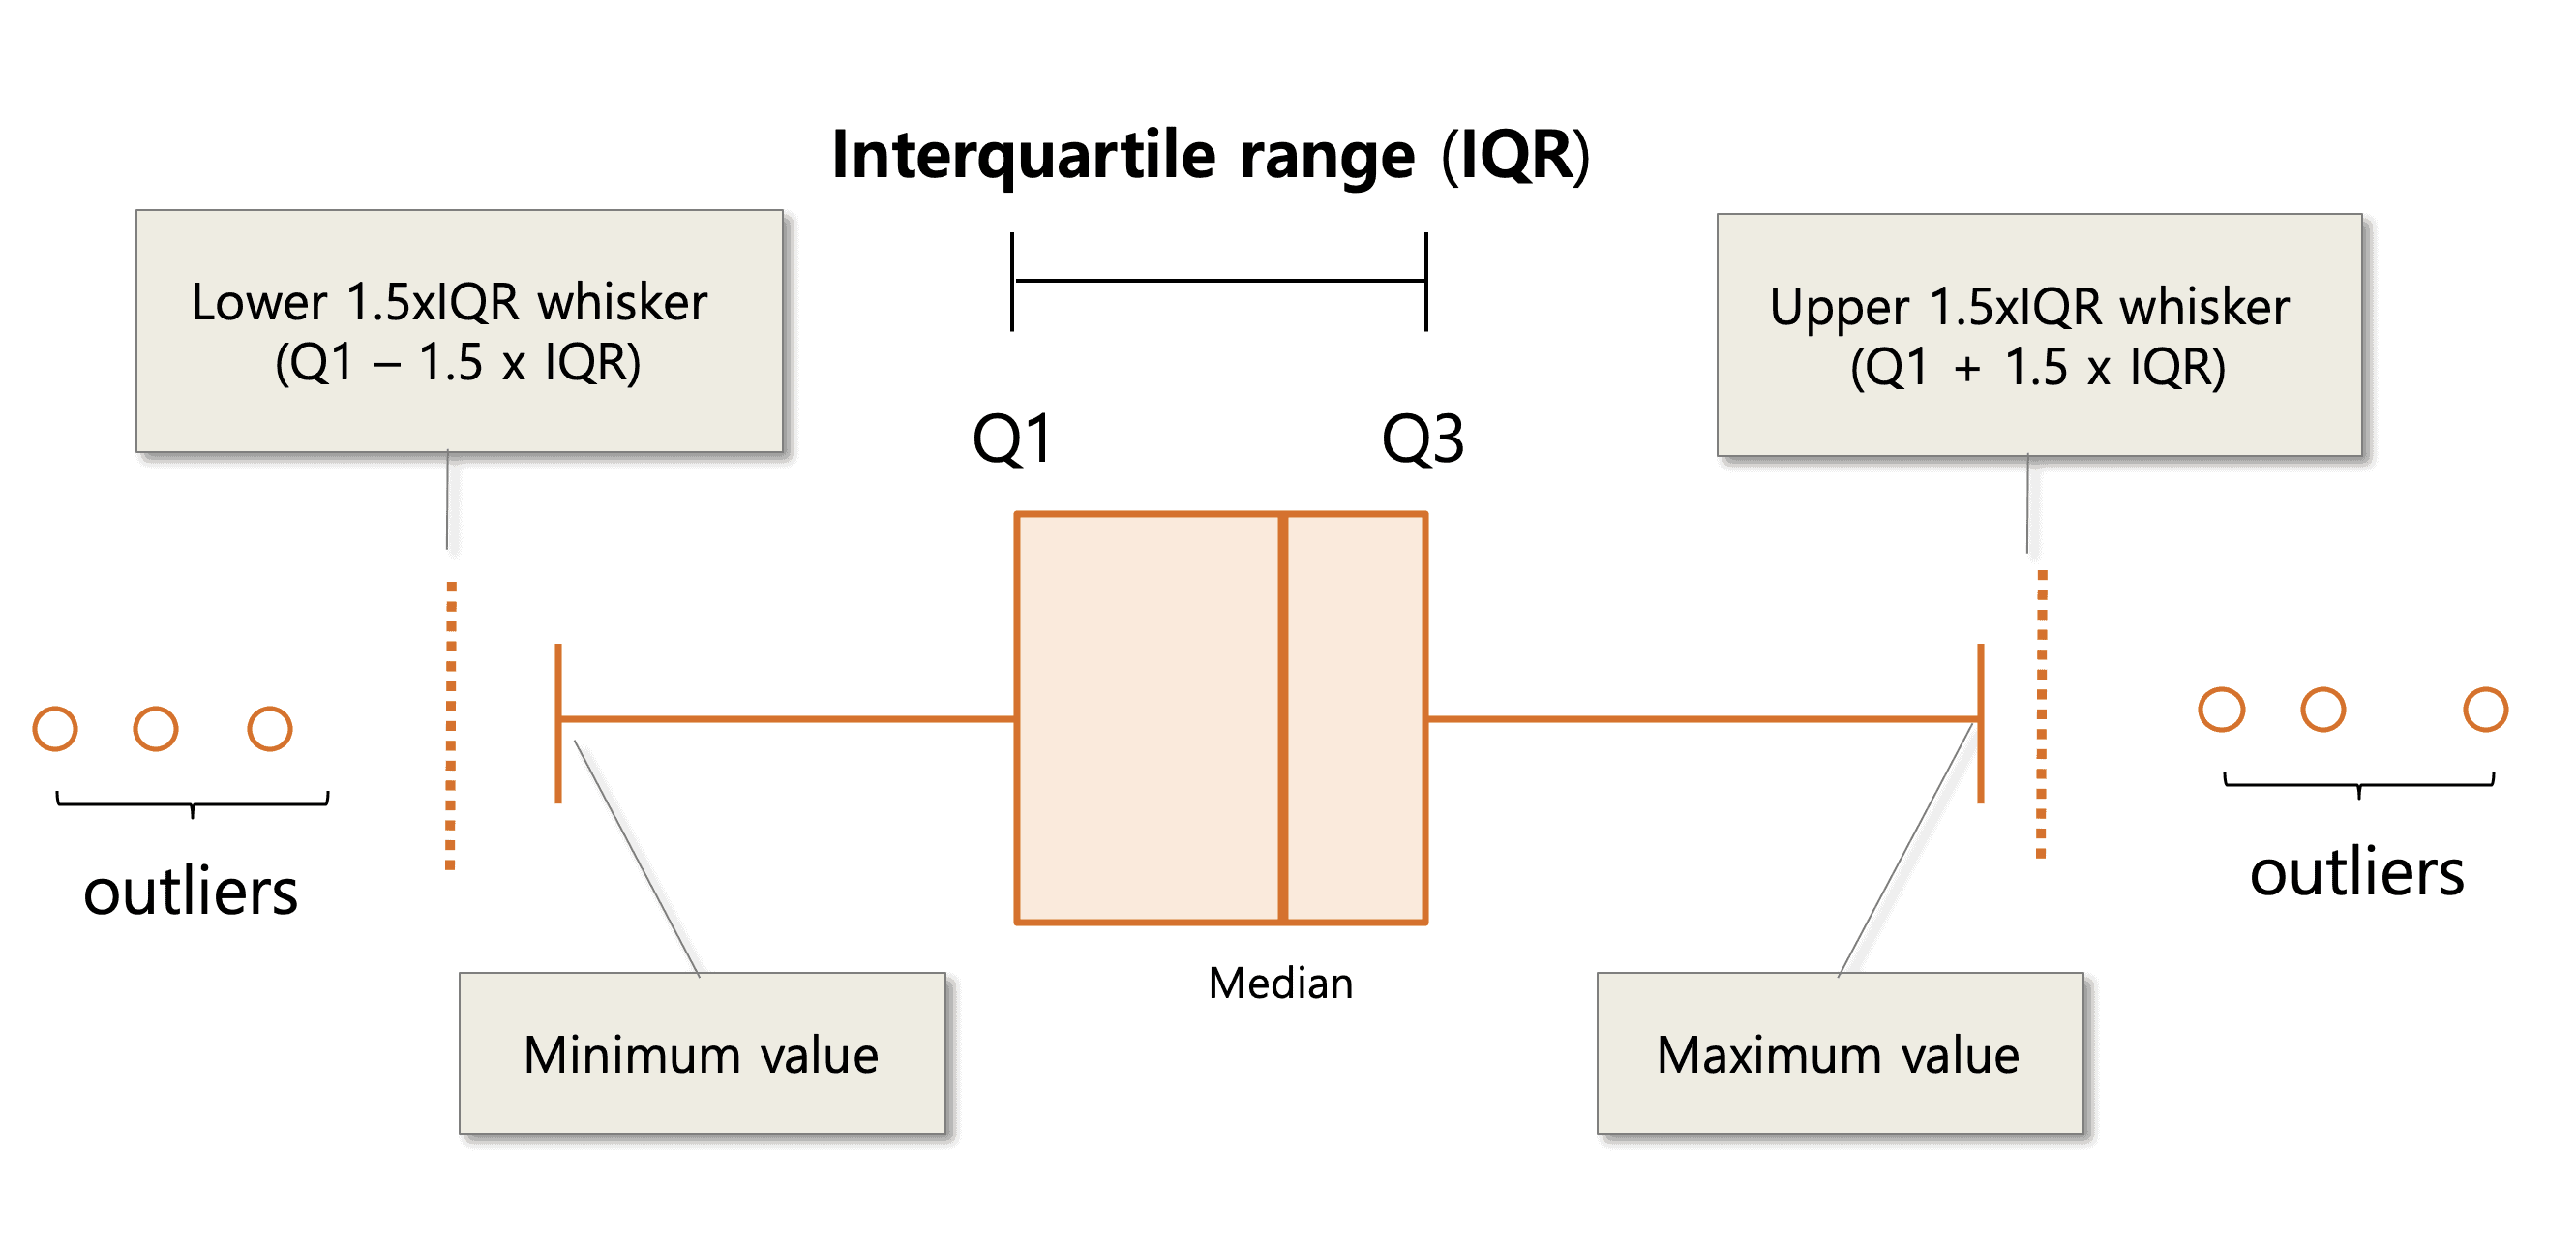

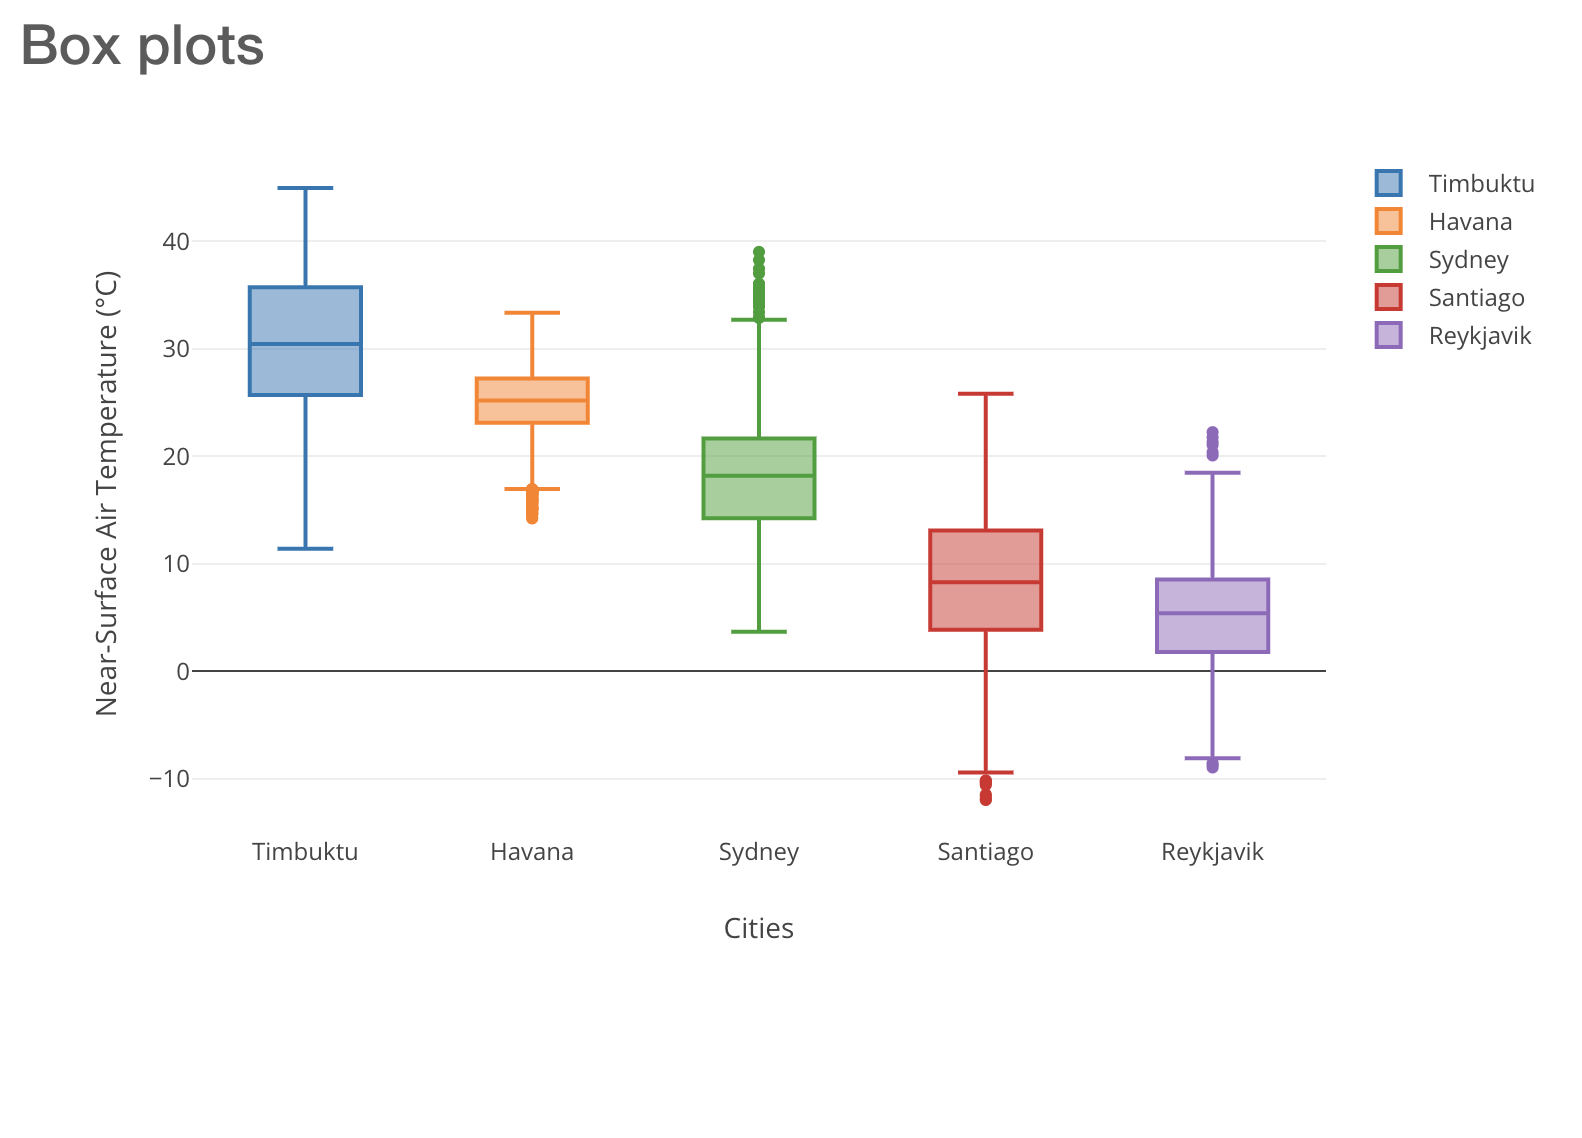

**Pergunta:** o boxplot seria uma visualização apropriada para alguma das colunas do nosso dataframe?

In [56]:
df.head()

,Unnamed: 0,ObservationDate,country,Casos confirmados,Mortes confirmadas,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0


<AxesSubplot: >

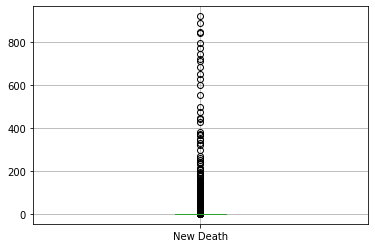

In [57]:
df.boxplot(column = 'New Death')

Outro exemplo: dataset de características associadas a doenças cardíacas

In [58]:
df_heart = pd.read_csv("../../Datasets/heart_failure_dataset.csv")

In [59]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot: >

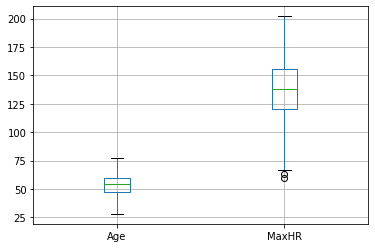

In [60]:
df_heart.boxplot(['Age', 'MaxHR'])

#### Referências extras sobre gráficos e visualizações no geral

https://www.data-to-viz.com/

https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6

Storytelling com dados: Um guia sobre visualização de dados para profissionais de negócios - by Cole Nussbaumer Knaflic

## Outros pacotes gráficos

### Matplotlib

O matplotlib é uma biblioteca que permite graficar diversos tipos de representações diretamente a partir de arrays. Possui essencialmente todos os tipos de gráficos que estudamos na aula passada, mas com uma sintaxe diferente a do pandas, o que afetará não somente como plotamos as visualizações, mas, também, elementos "estéticos" associados a elas (como legendas, eixos e afins). 

É um pacote de visualização gráfica altamente utilizado em Python, **e que baseia a construção de gráficos em diversas outras bibliotecas**, como seaborn, e o próprio **pandas**. 

Em vários dos plots que fizemos acima, talvez você tenha notado que o retorno da função .plot é um objeto do tipo "axes", **estrutural do matplotlib**. A biblioteca do matplotlib define alguns **elementos básicos** a partir dos quais se estruturam todas as suas funções.

#### Elementos básicos de uma figura com matplotlib

[Guia oficial do matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Na figura abaixo, temos definidos os **elementos básicos** mencionados acima. Eles servirão como parâmetros nas mais variadas funções da biblioteca.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="600"/>

É essencial que entendamos três outros elementos fundamentais para a melhor utilização da biblioteca matplotlib:

**-Figure:** a visualização em si; a imagem que é impressa na tela.

**-Axes:** o "corpo" do gráfico. Refere-se ao plot em si.

**-Axis:** os eixos do plot (eixo-x; eixo-y; eixo-z).

Vamos retomar uma das visualizações que fizemos acima, para contrastá-la ao matplotlib:

<AxesSubplot: xlabel='ObservationDate'>

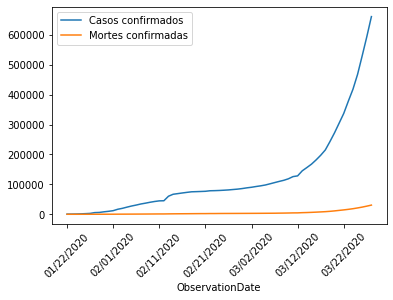

In [62]:
df.groupby("ObservationDate")[['Casos confirmados', 'Mortes confirmadas']]\
    .sum()\
    .plot(rot = 45)

In [63]:
import matplotlib.pyplot as plt

In [65]:
# E em matplotlib?
grouped_df = df.groupby("ObservationDate")[['Casos confirmados', 'Mortes confirmadas']]\
    .sum()

In [66]:
grouped_df

,Casos confirmados,Mortes confirmadas
ObservationDate,,
01/22/2020,555,17
01/23/2020,654,18
01/24/2020,941,26
01/25/2020,1438,42
01/26/2020,2118,56
...,...,...
03/24/2020,417981,18622
03/25/2020,467609,21188
03/26/2020,529606,23979


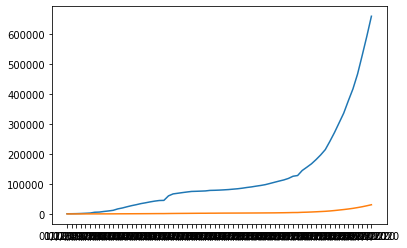

In [74]:
ax = plt.plot(grouped_df)

In [75]:
ax[0]

Note que, apesar de o matplotlib entender, a partir de um DataFrame pandas, as estruturas que devem ser plotadas, ainda há muitas diferenças entre o gráfico que geramos acima, com pandas, e este último! 

Por padrão, o pandas já personaliza algumas instâncias do gráfico que, com matplotlib, precisam ser especificadas manualmente.

In [77]:
# pega as datas do dataframe agrupado
datas = grouped_df.index.to_list()

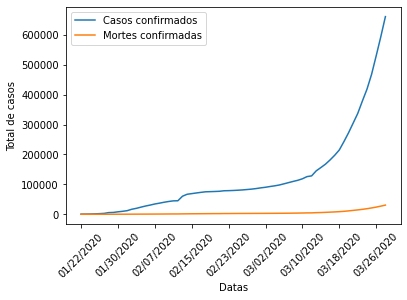

In [83]:
# Epsecificando apenas elementos específicos no eixo-x
fig, ax = plt.subplots()
plt.plot(datas,grouped_df)

plt.xlabel('Datas')
plt.ylabel('Total de casos')
plt.legend(['Casos confirmados', 'Mortes confirmadas'])

ax.set_xticks(datas[::8])
ax.set_xticklabels(datas[::8], rotation = 45);

Apesar de aparentemente mais trabalhoso, os elementos gráficos definidos pelo matplotlib permitem uma grande gama de personalização nas figuras, que às vezes pode ser difícil de conseguir com outros pacotes gráficos. Assim, pode haver situações em que utilizar diretamente o matplotlib para gerar as visualizações seja mais interessante. 

Como o pandas, por exemplo, retorna os elementos "ax" (axes) do matplotlib, podemos utilizar as propriedades deste elemento se quisermos manipular nossas figuras, como no exemplo abaixo.

In [85]:
dg.head()

,New Confirmed,New Death
country,,
azerbaijan,0,0
"('st. martin',)",2,0
afghanistan,110,4
albania,197,10
algeria,454,29


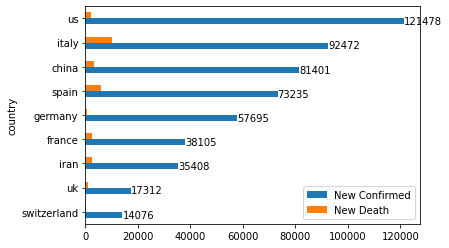

In [92]:
ax = dg[dg['New Confirmed'] > 10000].sort_values(by = 'New Confirmed').plot(kind = 'barh')
ax.bar_label(ax.containers[0]);

In [89]:
ax.containers

[<BarContainer object of 9 artists>, <BarContainer object of 9 artists>]

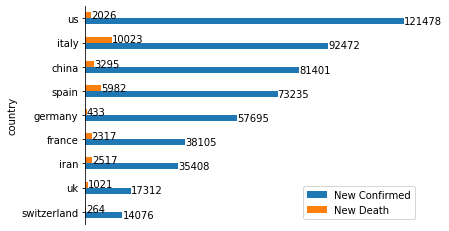

In [96]:
ax = dg[dg['New Confirmed'] > 10000].sort_values(by = 'New Confirmed').plot(kind = 'barh')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_visible(False)

### Seaborn

A biblioteca **seaborn** é baseada em **matplotlib**, e se integra, também, facilmanete a **pandas**. É muito utilizada para gerar visualizações estatísticas, principalmente durante **análises exploratórias de dados**, através de uma API de alto nível. 

Por padrão, a biblioteca já gera visualizações esteticamente bastante agradáveis.

**Leituras interessantes**

[Artigo científico da biblioteca](https://joss.theoj.org/papers/10.21105/joss.03021)

[Guia introdutório da biblioteca](https://seaborn.pydata.org/tutorial/introduction.html)

Alguns pontos para se ter em mente (destacados no próprio guia introdutório mencionado acima):

*While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.*

A biblioteca **seaborn** distingue entre funções a nível de **axes** e de **figure**. 

**Axes-level functions:** similarmente ao matplotlib, estas funções atuam no espaço dos "axes" (área do plot em si).

**Figure-level functions:** também similarmente ao matplotlib, atuam a nível "figura" compreendendo o espaço além dos plots.

**Facet grid:** objeto do seaborn que permite a interação com matplotlib.

A figura abaixo apresenta uma visão geral de alguns dos tipos de plot que conseguimos efetuar com a biblioteca **seaborn**.

<img src = "https://seaborn.pydata.org/_images/function_overview_8_0.png" />

[Overview de funções seaborn](https://seaborn.pydata.org/tutorial/function_overview.html)

#### Alguns exemplos de plots

**Gráfico de barras**

**Contagem de elementos**

Vamos avaliar a distribuição de algumas variáveis

**violinplot:** plot, também, para mostrar distribuições. Combina um boxplot com o kde.

[Leitura sobre violinplot](https://mode.com/blog/violin-plot-examples/)

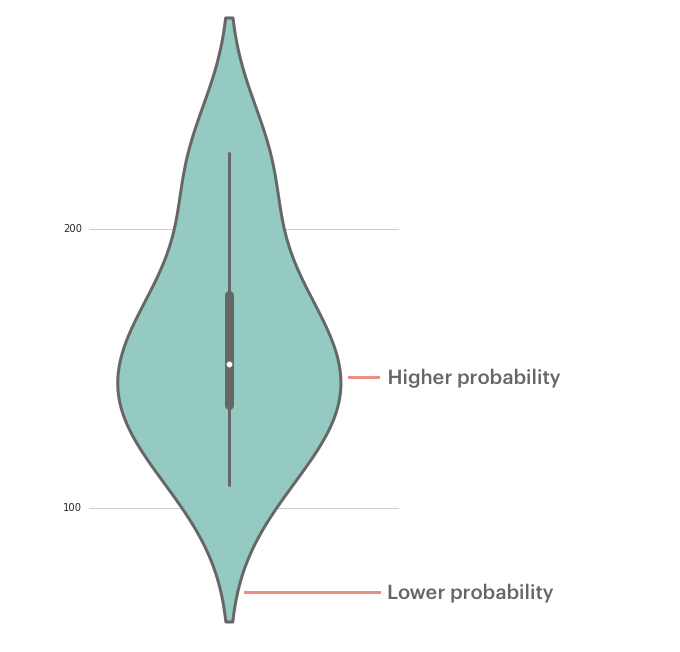

Visualizando relações entre características do dataset com **seaborn**.

A função **pairplot** sumariza as distribuições e relações entre as variáveis, par a par.

# Vamos praticar?

Com tudo o que discutimos em aula, em grupos, explorem o dataset de [vendas da Amazon](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) com questões norteadores que vocês julguem interessantes!

Fiquem à vontade para manipular os dados da maneira que vocês preferirem, e utilizarem os pacotes gráficos mais confortáveis para vocês.